<a href="https://colab.research.google.com/github/dhritisreec/ML/blob/ML-Projects/Image_based_Malware_Classification_using_CNN_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Data :
A Malware can belong to one of the following class :
 * Adialer.C
 * Agent.FYI
 * Allaple.A
 * Allaple.L
 * Alueron.gen!J
 * Autorun.K
 * C2LOP.P
 * C2LOP.gen!g
 * Dialplatform.B
 * Dontovo.A
 * Fakerean
 * Instantaccess
 * Lolyda.AA1
 * Lolyda.AA2
 * Lolyda.AA3
 * Lolyda.AT
 * Malex.gen!J
 * Obfuscator.AD
 * Rbot!gen
 * Skintrim.N
 * Swizzor.gen!E
 * Swizzor.gen!I
 * VB.AT
 * Wintrim.BX
 * Yuner.A

# Image-based Malware Classification using CNN




# Preprocessing - Converting to images

Raw malwares will be stored in the following folder:

In [2]:
root = "/content/gdrive/MyDrive/dataRaw"

The following function allows us to convert our hexadecimal **.bytes** files stored into our 'data' folder, into PNG images.

files :  ['0ACDbR5M3ZhBJajygTuf.bytes.png', '0ACDbR5M3ZhBJajygTuf.bytes', '0A32eTdBKayjCWhZqDOQ.bytes', '0A32eTdBKayjCWhZqDOQ.bytes.png']
Processing 0ACDbR5M3ZhBJajygTuf.bytes
Processing 0A32eTdBKayjCWhZqDOQ.bytes


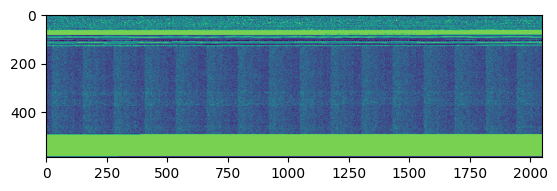

In [3]:
import sys
import os
from math import log
import numpy as np
import scipy as sp
from PIL import Image
import matplotlib.pyplot as plt

## This function allows us to process our hexadecimal files into png images##
def convertAndSave(array,name):
    print('Processing '+name)
    if array.shape[1]!=16: #If not hexadecimal
        assert(False)
    b=int((array.shape[0]*16)**(0.5))
    b=2**(int(log(b)/log(2))+1)
    a=int(array.shape[0]*16/b)
    array=array[:a*b//16,:]
    array=np.reshape(array,(a,b))
    im = Image.fromarray(np.uint8(array))
    im.save(root+ name+'.png', "PNG")
    return im

#Get the list of files
files=os.listdir(root)
print('files : ',files)
#We will process files one by one.
for counter, name in enumerate(files):
        #We only process .bytes files from our folder.
        if '.bytes' != name[-6:]:
            continue
        f=open(root+'/'+name)
        array=[]
        for line in f:
            xx=line.split()
            if len(xx)!=17:
                continue
            array.append([int(i,16) if i!='??' else 0 for i in xx[1:] ])
        plt.imshow(convertAndSave(np.array(array),name))
        del array
        f.close()

# Preprocessing - Generate the dataset

Here is our new folder :

In [4]:
path_root = "/content/gdrive/MyDrive/dataset/"


In [18]:
!pip install tensorflow --upgrade

  Using cached tensorflow-2.16.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (589.8 MB)
  Using cached keras-3.3.3-py3-none-any.whl (1.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.16.1 which is incompatible.


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batches = ImageDataGenerator().flow_from_directory(directory=path_root, target_size=(64,64), batch_size=10000)


Found 9389 images belonging to 25 classes.


To be able to use our images for training and testing, lets use **ImageDataGenerator.flow_from_directory()** which generates batches of normalized tensor image data from the respective data directories.
  * **target_size** : Will resize all images to the specified size. I personally chose (64*64) images.
  * **batch_size** : Is the size of the batch we will use.

We can see that our 25 classes have been well recognized (thanks to our subfolders). Let's clarify this using the dictionnary.

In [7]:
batches.class_indices

{'Adialer.C': 0,
 'Agent.FYI': 1,
 'Allaple.A': 2,
 'Allaple.L': 3,
 'Alueron.gen!J': 4,
 'Autorun.K': 5,
 'C2LOP.P': 6,
 'C2LOP.gen!g': 7,
 'Dialplatform.B': 8,
 'Dontovo.A': 9,
 'Fakerean': 10,
 'Instantaccess': 11,
 'Lolyda.AA1': 12,
 'Lolyda.AA2': 13,
 'Lolyda.AA3': 14,
 'Lolyda.AT': 15,
 'Malex.gen!J': 16,
 'Obfuscator.AD': 17,
 'Rbot!gen': 18,
 'Skintrim.N': 19,
 'Swizzor.gen!E': 20,
 'Swizzor.gen!I': 21,
 'VB.AT': 22,
 'Wintrim.BX': 23,
 'Yuner.A': 24}

**batches** generated with ImageDataGenerator() is an iterator. Hence, we use next() to go through all its elements and generate a batch of images and labels from the data set.

In [8]:
imgs, labels = next(batches)

As you can see, our images are in RGB with shape 64x64 [width x length x depth].

In [9]:
imgs.shape

(9389, 64, 64, 3)

**labels** has the shape (batch_size, number of classes).

In [11]:
labels.shape

(9389, 25)

In [12]:
import sys
import os
from math import log
import numpy as np
import scipy as sp
from PIL import Image
import matplotlib.pyplot as plt

The following method allows us to plot a sample of images in our dataset.

In [13]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(20,30), rows=10, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = 10 # len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(0,50):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(list(batches.class_indices.keys())[np.argmax(titles[i])], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

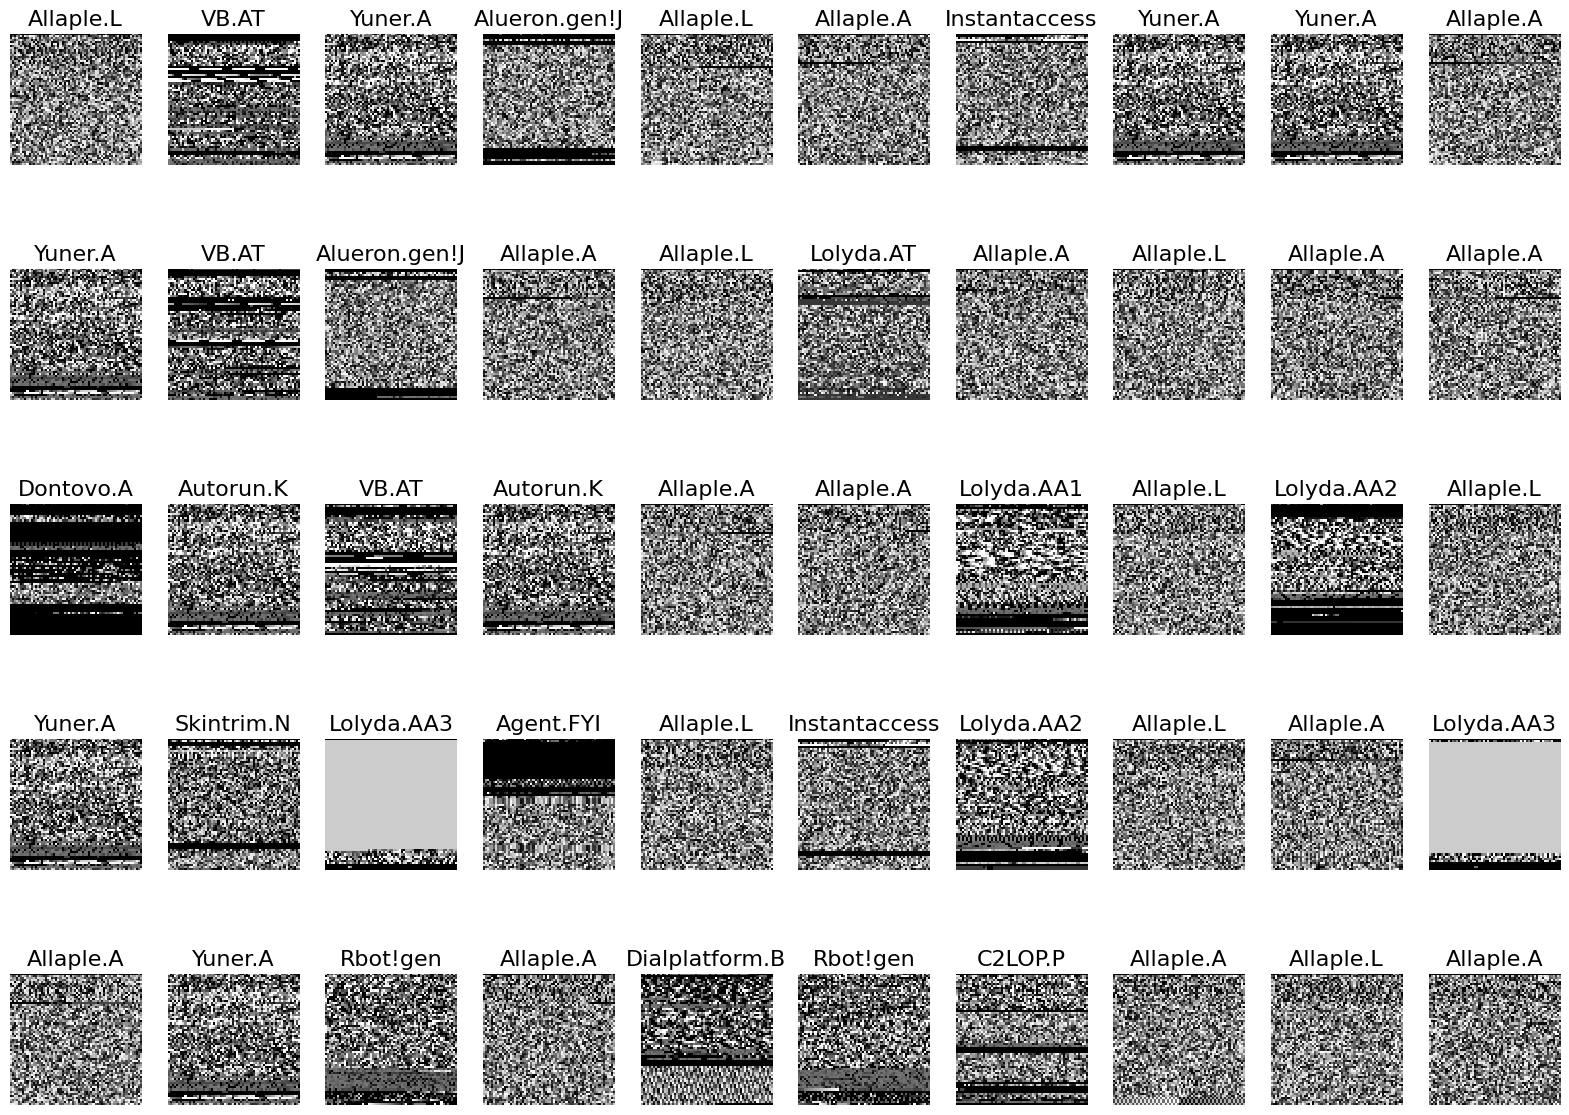

In [14]:
plots(imgs, titles = labels)

We can already observe differences between classes.

# Analyse

All our images are finally ready to be used. Lets check out the repartition of data between classes :

In [15]:
classes = batches.class_indices.keys()

In [16]:
perc = (sum(labels)/labels.shape[0])*100

<BarContainer object of 25 artists>

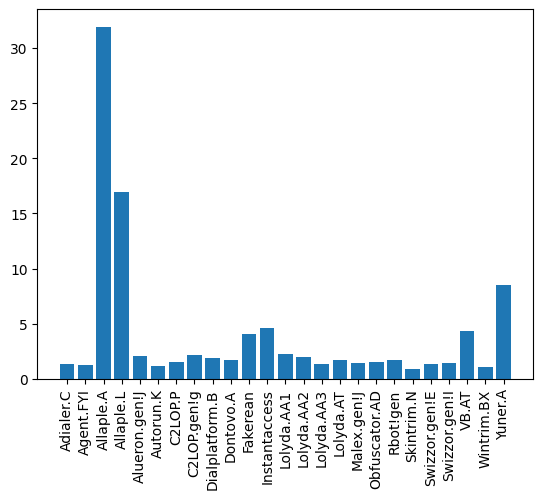

In [17]:
plt.xticks(rotation='vertical')
plt.bar(classes,perc)

We can see that our dataset is quite unbalanced : a lot of Malwares belong to class 2 : **Allaple.A** and class 3 : **Allaple.L** !


# Train and test

Lets split our model into train and test following a ratio 70% train - 30% test ratio.

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(imgs/255.,labels, test_size=0.3)

In [19]:
X_train.shape

(6572, 64, 64, 3)

In [20]:
X_test.shape

(2817, 64, 64, 3)

In [21]:
y_train.shape

(6572, 25)

In [22]:
y_test.shape

(2817, 25)

## Convolutional Neural Network Model

*Our* **CNN** model using Keras. This model will have the following layers :

* **Convolutional Layer** : 30 filters, (3 * 3) kernel size
* **Max Pooling Layer** : (2 * 2) pool size
* **Convolutional Layer** : 15 filters, (3 * 3) kernel size
* **Max Pooling Layer** : (2 * 2) pool size
* **DropOut Layer** : Dropping 25% of neurons.
* **Flatten Layer**
* **Dense/Fully Connected Layer** : 128 Neurons, Relu activation function
* **DropOut Layer** : Dropping 50% of neurons.
* **Dense/Fully Connected Layer** : 50 Neurons, Softmax activation function
* **Dense/Fully Connected Layer** : num_class Neurons, Softmax activation function

**Input shape** : 64 * 64 * 3

In [23]:
!pip install keras-models

In [24]:
import keras
import tensorflow
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
#from keras.layers.normalization import BatchNormalization
from keras.layers import BatchNormalization
from keras.metrics import AUC



We want **25** classes as output.

In [25]:
num_classes = 25

Building the model

In [38]:
def Malware_model():
    Malware_Model = Sequential()
    Malware_Model.add(Conv2D(30, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(64,64,3)))

    Malware_Model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_Model.add(Conv2D(15, (3, 3), activation='relu'))
    Malware_Model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_Model.add(Dropout(0.25))
    Malware_Model.add(Flatten())
    Malware_Model.add(Dense(128, activation='relu'))
    Malware_Model.add(Dropout(0.5))
    Malware_Model.add(Dense(50, activation='relu'))
    Malware_Model.add(Dense(num_classes, activation='softmax'))
    Malware_Model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return Malware_Model

Malware_Model = Malware_model()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
from keras import backend as K
import tensorflow as tf

def precision_m(y_test, y_pred):
    true_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_test * y_pred, 0, 1)))
    predicted_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    return precision

def recall_m(y_test, y_pred):
    true_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_test * y_pred, 0, 1)))
    possible_positives = tf.reduce_sum(tf.round(tf.clip_by_value(y_test, 0, 1)))
    recall = true_positives / (possible_positives + tf.keras.backend.epsilon())
    return recall

def f1_m(y_test, y_pred):
    precision = precision_m(y_test, y_pred)
    recall = recall_m(y_test, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))



In [59]:
Malware_Model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 62, 62, 30)          │             840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 31, 31, 30)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 15)          │           4,065 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 15)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 15)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2940)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         376,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 50)                  │           6,450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 25)                  │           1,275 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,167,236 (4.45 MB)

 Trainable params: 389,078 (1.48 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 778,158 (2.97 MB)

In [60]:
y_train.shape

(6572, 25)



**class_weights** uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data. To use this method, y_train must not be one hot encoded.

In [61]:
y_train_new = np.argmax(y_train, axis=1)

In [62]:
y_train_new

array([ 2, 21, 21, ..., 24,  2, 10])

In [63]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight = 'balanced',
                                                 classes = np.unique(y_train_new),
                                                 y = y_train_new)
#class_weights = {i : class_weights[i] for i in range(5)}

class_weights = {l:c for l,c in zip(np.unique(y_train_new), class_weights)}



In [64]:
Malware_Model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[f1_m,precision_m, recall_m,AUC()])


In [97]:
Malware_Model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100,  class_weight=class_weights)

Epoch 1/100
206/206 ━━━━━━━━━━━━━━━━━━━━ 37s 181ms/step - auc_4: 0.9983 - f1_m: 0.9319 - loss: 0.0088 - precision_m: 0.9351 - recall_m: 0.9288 - val_auc_4: 0.9930 - val_f1_m: 0.8836 - val_loss: 0.0146 - val_precision_m: 0.8837 - val_recall_m: 0.8834
Epoch 2/100
206/206 ━━━━━━━━━━━━━━━━━━━━ 37s 162ms/step - auc_4: 0.9985 - f1_m: 0.9237 - loss: 0.0090 - precision_m: 0.9270 - recall_m: 0.9205 - val_auc_4: 0.9926 - val_f1_m: 0.8834 - val_loss: 0.0147 - val_precision_m: 0.8837 - val_recall_m: 0.8831
Epoch 3/100
206/206 ━━━━━━━━━━━━━━━━━━━━ 40s 155ms/step - auc_4: 0.9987 - f1_m: 0.9363 - loss: 0.0080 - precision_m: 0.9388 - recall_m: 0.9340 - val_auc_4: 0.9934 - val_f1_m: 0.8828 - val_loss: 0.0147 - val_precision_m: 0.8833 - val_recall_m: 0.8824
Epoch 4/100
206/206 ━━━━━━━━━━━━━━━━━━━━ 43s 167ms/step - auc_4: 0.9988 - f1_m: 0.9429 - loss: 0.0083 - precision_m: 0.9450 - recall_m: 0.9410 - val_auc_4: 0.9928 - val_f1_m: 0.8836 - val_loss: 0.0159 - val_precision_m: 0.8837 - val_recall_m: 0.8834


In [121]:
import json
history = Malware_Model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20,  class_weight=class_weights)

# Save the history
with open('training_history.json', 'w') as f:
    json.dump(history.history, f)

Epoch 1/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 34s 165ms/step - auc_4: 0.9988 - f1_m: 0.9477 - loss: 0.0066 - precision_m: 0.9494 - recall_m: 0.9461 - val_auc_4: 0.9908 - val_f1_m: 0.8820 - val_loss: 0.0173 - val_precision_m: 0.8823 - val_recall_m: 0.8817
Epoch 2/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 35s 168ms/step - auc_4: 0.9990 - f1_m: 0.9510 - loss: 0.0065 - precision_m: 0.9526 - recall_m: 0.9494 - val_auc_4: 0.9913 - val_f1_m: 0.9622 - val_loss: 0.0169 - val_precision_m: 0.9624 - val_recall_m: 0.9621
Epoch 3/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 38s 155ms/step - auc_4: 0.9994 - f1_m: 0.9692 - loss: 0.0061 - precision_m: 0.9702 - recall_m: 0.9682 - val_auc_4: 0.9911 - val_f1_m: 0.9628 - val_loss: 0.0166 - val_precision_m: 0.9628 - val_recall_m: 0.9628
Epoch 4/20
206/206 ━━━━━━━━━━━━━━━━━━━━ 31s 152ms/step - auc_4: 0.9995 - f1_m: 0.9687 - loss: 0.0054 - precision_m: 0.9699 - recall_m: 0.9676 - val_auc_4: 0.9888 - val_f1_m: 0.8843 - val_loss: 0.0193 - val_precision_m: 0.8845 - val_recall_m: 0.8841
Epoc

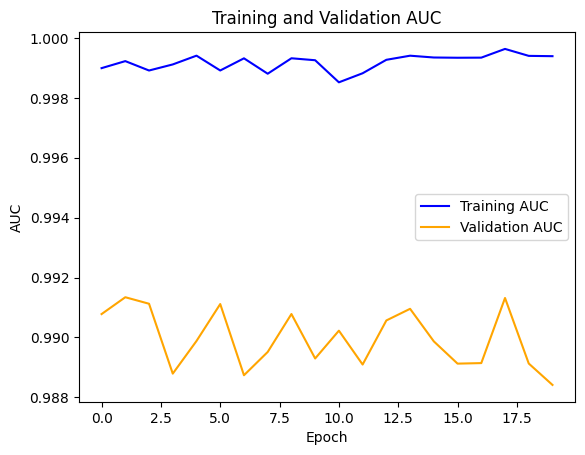

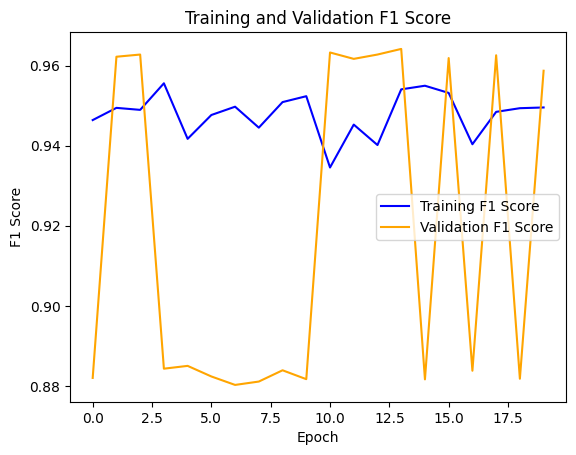

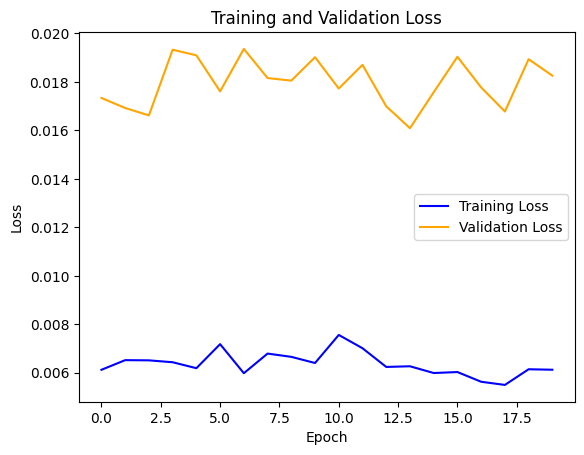

In [128]:
import matplotlib.pyplot as plt

# Get the training and validation metrics from the history object
train_auc = history.history['auc_4']
val_auc = history.history['val_auc_4']
train_f1 = history.history['f1_m']
val_f1 = history.history['val_f1_m']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create line graphs for AUC
plt.plot(train_auc, label='Training AUC', color='blue')
plt.plot(val_auc, label='Validation AUC', color='orange')
plt.title('Training and Validation AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()
plt.show()

# Create line graphs for F1 score
plt.plot(train_f1, label='Training F1 Score', color='blue')
plt.plot(val_f1, label='Validation F1 Score', color='orange')
plt.title('Training and Validation F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

# Create line graphs for loss
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [122]:
scores = Malware_Model.evaluate(X_test, y_test)
scores

89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - auc_4: 0.9908 - f1_m: 0.9608 - loss: 0.0161 - precision_m: 0.9611 - recall_m: 0.9606


[0.01825878769159317,
 0.9587345719337463,
 0.9589072465896606,
 0.9585674405097961,
 0.988411545753479]

In [99]:
loss, accuracy, f1_score, precision, recall = Malware_Model.evaluate(X_test, y_test)


89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - auc_4: 0.9916 - f1_m: 0.9633 - loss: 0.0170 - precision_m: 0.9635 - recall_m: 0.9631


In [101]:
print('Final CNN accuracy: ', scores[1])

Final CNN accuracy:  0.9583667516708374


# Confusion Matrix

Lets analyse our results.

In [102]:
import numpy as np
import pandas as pd

In [103]:
y_pred = np.argmax(Malware_Model.predict(X_test), axis=-1)



89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step


In [104]:
y_pred

array([23, 24,  3, ...,  2,  2,  2])

In [105]:
y_test2 = np.argmax(y_test, axis=1)

In [106]:
y_test2

array([23, 24,  3, ...,  2,  2,  2])

In [107]:
from sklearn import metrics
c_matrix = metrics.confusion_matrix(y_test2, y_pred)

In [108]:
import seaborn as sns
def confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

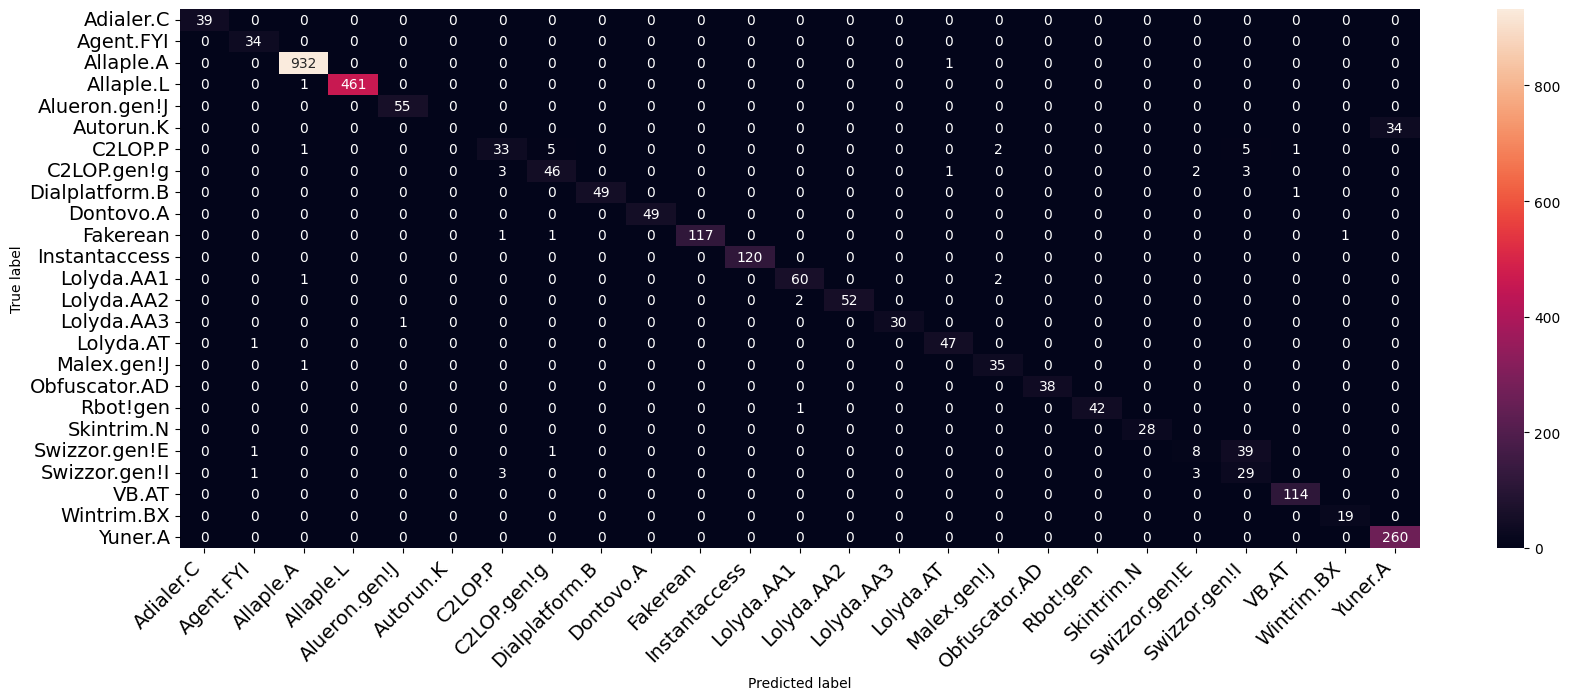

In [109]:
class_names= batches.class_indices.keys()
confusion_matrix(c_matrix, class_names, figsize = (20,7), fontsize=14)

Here is our confusion matrix. We can observe that although most of the malwares were well classified, **Autorun.K** is always mistaken for **Yuner.A**. This is probably due to the fact that we have very few samples of **Autorun.K** in our training set. Moreover, **Swizzor.gen!E** is often mistaken with **Swizzor.gen!l**, which can be explained by the fact that they come from really close famillies and thus could have similarities in their code.

In [110]:
results = pd.DataFrame({ 'CNN Model': 'Malware model',
    'Accuracy': [scores[1]],
    'Loss': [scores[0]],
    'Precision': [scores[3]],
    'Recall' : [scores[4]],
    'f1 score': [scores[2]]})

In [111]:
results

,CNN Model,Accuracy,Loss,Precision,Recall,f1 score
0,Malware model,0.958367,0.02055,0.957865,0.988534,0.958885


In [119]:
from sklearn.metrics import classification_report
import numpy as np

Y_test = np.argmax(y_test, axis=1) # Convert one-hot to index
y_pred = np.argmax(Malware_Model.predict(X_test), axis=-1)
print(classification_report(Y_test, y_pred))

89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.92      1.00      0.96        34
           2       1.00      1.00      1.00       933
           3       1.00      1.00      1.00       462
           4       0.98      1.00      0.99        55
           5       0.00      0.00      0.00        34
           6       0.82      0.70      0.76        47
           7       0.87      0.84      0.85        55
           8       1.00      0.98      0.99        50
           9       1.00      1.00      1.00        49
          10       1.00      0.97      0.99       120
          11       1.00      1.00      1.00       120
          12       0.95      0.95      0.95        63
          13       1.00      0.96      0.98        54
          14       1.00      0.97      0.98        31
          15       0.96      0.98      0.97        48
          16       0.90      0.97      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [113]:
import pickle
import matplotlib.pyplot as plt
from PIL import Image
import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
import PIL


In [129]:
from keras.models import load_model

#Malware_Model.save('/content/gdrive/My Drive/Malware_Classification/models/my_model.h5')

model = load_model('/content/gdrive/My Drive/Malware_Classification/models/my_model.h5')

In [135]:
#Cross validation

from sklearn.model_selection import KFold
import numpy as np
from keras.optimizers import Adam  # Import the optimizer used in your model


y_np = np.array(y_test)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize a list to store cross-validation scores
scores = []

# Iterate over the folds
for train_index, val_index in kf.split(X_test):
    X_train, X_val = X_test[train_index], X_test[val_index]
    y_train, y_val = y_np[train_index], y_np[val_index]

    # Compile the model with a new optimizer instance
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    # Train your Keras model on the current fold
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

    # Evaluate the model on the current fold
    score = model.evaluate(X_val, y_val)
    scores.append(score)

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Cross-Validation Score:", np.mean(scores))


Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 127ms/step - accuracy: 0.9405 - loss: 0.0196 - val_accuracy: 0.9610 - val_loss: 0.0106
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 12s 164ms/step - accuracy: 0.9624 - loss: 0.0114 - val_accuracy: 0.9592 - val_loss: 0.0104
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 18s 131ms/step - accuracy: 0.9603 - loss: 0.0097 - val_accuracy: 0.9610 - val_loss: 0.0095
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 144ms/step - accuracy: 0.9614 - loss: 0.0088 - val_accuracy: 0.9628 - val_loss: 0.0096
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 21s 148ms/step - accuracy: 0.9730 - loss: 0.0075 - val_accuracy: 0.9645 - val_loss: 0.0095
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 21s 159ms/step - accuracy: 0.9676 - loss: 0.0069 - val_accuracy: 0.9716 - val_loss: 0.0091
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 18s 120ms/step - accuracy: 0.9745 - loss: 0.0065 - val_accuracy: 0.9645 - val_loss: 0.0091
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 12s 144ms/step - accuracy: 0.9763 - loss: 0.0058 - val_accu

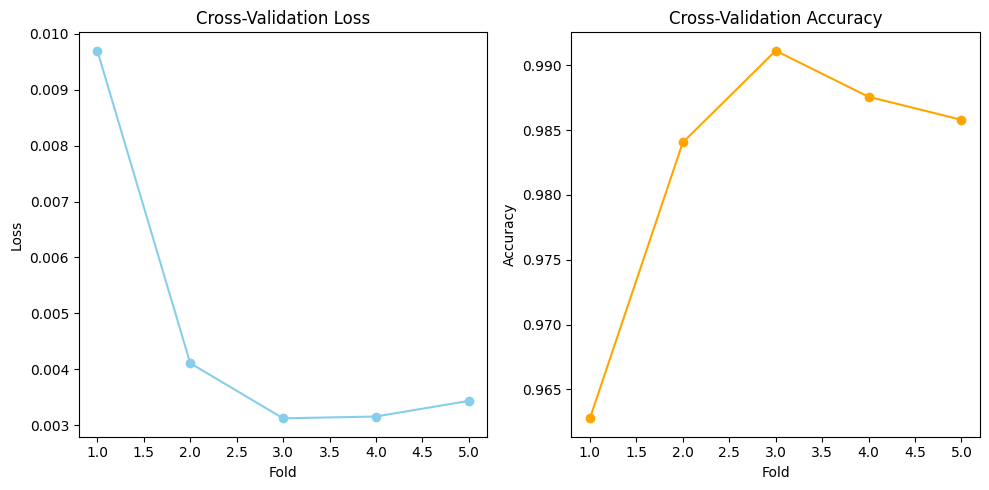

In [136]:
import numpy as np
import matplotlib.pyplot as plt

# Cross-validation results: loss and accuracy for each fold
cross_val_results = scores

# Convert the list of lists to a numpy array for easier manipulation
cross_val_results = np.array(cross_val_results)

# Extract loss and accuracy values
loss_values = cross_val_results[:, 0]
accuracy_values = cross_val_results[:, 1]

# Plotting loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(np.arange(len(loss_values)) + 1, loss_values, marker='o', color='skyblue')
plt.xlabel('Fold')
plt.ylabel('Loss')
plt.title('Cross-Validation Loss')

# Plotting accuracy
plt.subplot(1, 2, 2)
plt.plot(np.arange(len(accuracy_values)) + 1, accuracy_values, marker='o', color='orange')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy')

plt.tight_layout()
plt.show()


(1, 64, 64, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
Lolyda.AA3
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0.]]


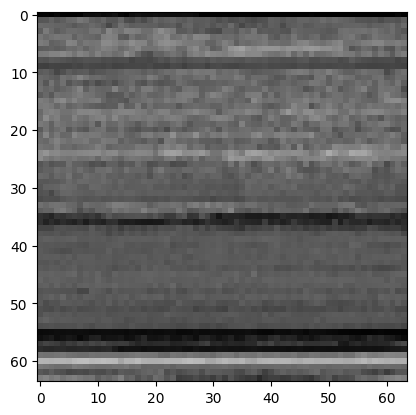

In [118]:

img = load_img("/content/gdrive/MyDrive/03c54e704f672dedcf8a9c171c735c5b.png")
img = img.resize((64, 64))
plt.imshow(img)
CATEGORIES = ['Adialer.C','Agent.FYI', 'Allaple.A', 'Allaple.L', 'Alueron.gen!J','Autorun.K', 'C2LOP.P','C2LOP.gen!g','Dialplatform.B', 'Dontovo.A', 'Fakerean', 'Instantaccess', 'Lolyda.AA1', 'Lolyda.AA2', 'Lolyda.AA3','Lolyda.AT', 'Malex.gen!J', 'Obfuscator.AD', 'Rbot!gen','Skintrim.N', 'Swizzor.gen!E', 'Swizzor.gen!I', 'VB.AT', 'Wintrim.BX', 'Yuner.A']

img = img_to_array(img)
img = img.reshape( -1,64, 64,3)
#print(img)
print(img.shape)
#model.summary()
prediction = model.predict(img)
pred_name = CATEGORIES[np.argmax(prediction)]
print(pred_name)
print(prediction)